# Image Compression via K-means
Source: CS229, PS3, Q5

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A = imread('cs229_Data/mandrill-large.tiff')

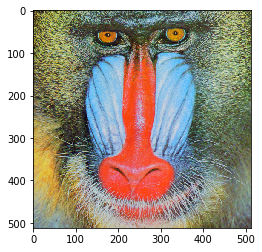

In [3]:
plt.imshow(A)

## K-means clustering using a smaller image

In [4]:
B = imread('cs229_Data/mandrill-small.tiff')

In [5]:
# Vectorise the image X, there are 128x128 data in 3D color space
X = B.reshape((-1,3))/255

See [k-Nearest neighbours](https://github.com/meichen91/MachineLearning-Snippets/blob/master/Week1/KNN_Vectorisation.ipynb) for the explanation of vectorised implementation of the following function

In [6]:
# Function to calculate the distance between X and K
def dist_cluster(X, C):
    N = np.shape(X)[0]
    K = np.shape(C)[0]
    A = np.sum(np.square(X),axis = 1)
    B = np.sum(np.square(C),axis = 1)
    C = np.dot(X,C.T)

    dists = np.sqrt(A[:,np.newaxis]+B[np.newaxis,:]-2*C)
    return dists

In [7]:
# Function to calculate the mean for different clusters
def update_cluster_mean(X, A, K):
    '''
    X is the data
    A is assigned_clusters
    '''
    K_list = np.unique(A)
    C = np.zeros((K,np.shape(X)[1]))
    for i in range(len(K_list)):
        C[i,:] = np.mean(X[A==K_list[i]], axis = 0)
    if len(K_list) < K:
        print('the number of cluster {} is less than the assigned cluster number {}'.format(len(K_list),K))
        # Add a new cluster center randomly
        C[len(K_list):] = np.random.rand(K-len(K_list),3)
    
    return C

In [9]:
# Initialise the cluster center
K = 16
C = np.random.rand(K,3)
diff = []
tol = 1
i = 0
# EM for Kmeans
while tol > 1e-8:
    # E-step
    C_old = C
    dists = dist_cluster(X, C)
    assigned_clusters = dists.argmin(axis = 1)
    # M-step
    C = update_cluster_mean(X, assigned_clusters, K)
    # Track convergence
    tol = np.linalg.norm(C_old - C)
    diff.append(tol)
    i = i + 1
print('finished at iter {0:d} final difference {1:.2e}'.format(i, tol))

the number of cluster 9 is less than the assigned cluster number 16
the number of cluster 15 is less than the assigned cluster number 16
the number of cluster 15 is less than the assigned cluster number 16
finished at iter 64 final difference 0.00e+00


# Compression
Compress the large picture using the clusters found from the small one

In [10]:
X2 = A.reshape((-1,3))/255
dists = dist_cluster(X2, C)
assigned_clusters = dists.argmin(axis = 1)
X2_compressed = np.zeros_like(X2)
for i in range(K):
    X2_compressed[assigned_clusters==i] = C[i]
A_compressed = np.reshape(X2_compressed,(np.shape(A)))

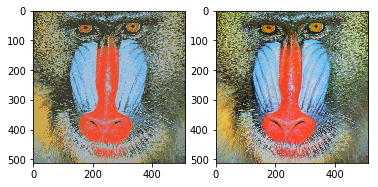

In [11]:
plt.subplot(1,2,1)
plt.imshow(A_compressed)
plt.subplot(1,2,2)
plt.imshow(A)

Great quality after compression! The most obvious defect is lack of details at the bottom left and the regions besides the noise.

## (d)
If we represent the image with these reduced (16) colors, by (approximately) what factor have we compressed the image?

The original image has $512\times 512 \times 3 \times 8$ bits in total

The compressed image has $512\times 512 \times 4 + 16\times 3 \times 8$ bits in total (Instead of the 24 bits color, the information stored in each pixel is which of the 16 clusters it belongs to (i.e., 3 bits)